In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
%matplotlib inline
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Data Importing

In [2]:
df = pd.read_csv ("xAPI-Edu-Data.csv")
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [4]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [5]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

### Q1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:xlabel='Semester', ylabel='count'>

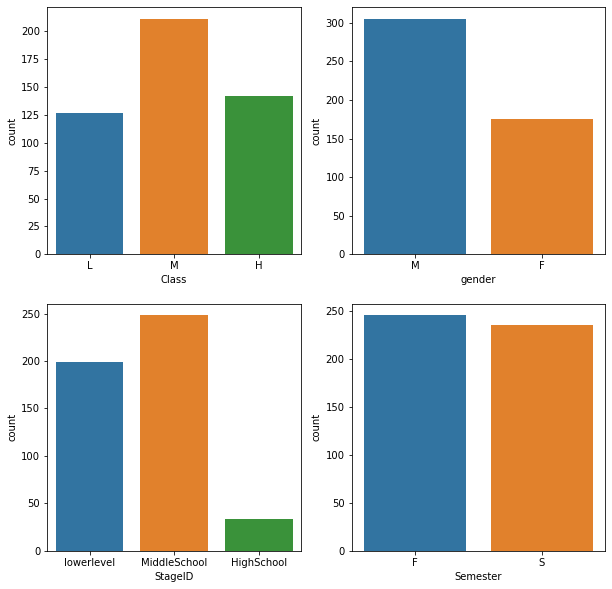

In [7]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=df, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=df, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=df, ax=axarr[1,0])
sns.countplot(x='Semester', data=df, ax=axarr[1,1])

* There is highest count of student who get middleclass
* Male counts is greater than feamle

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

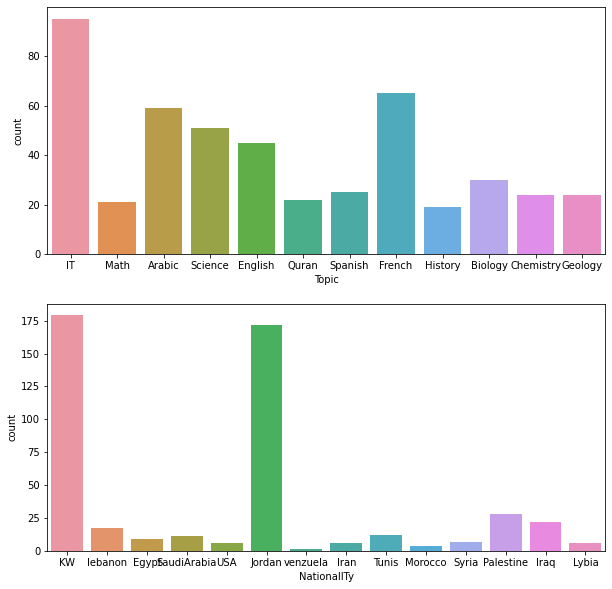

In [8]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=df, ax=axis1)
sns.countplot(x='NationalITy', data=df, ax=axis2)

### Q2.Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='Class', ylabel='count'>

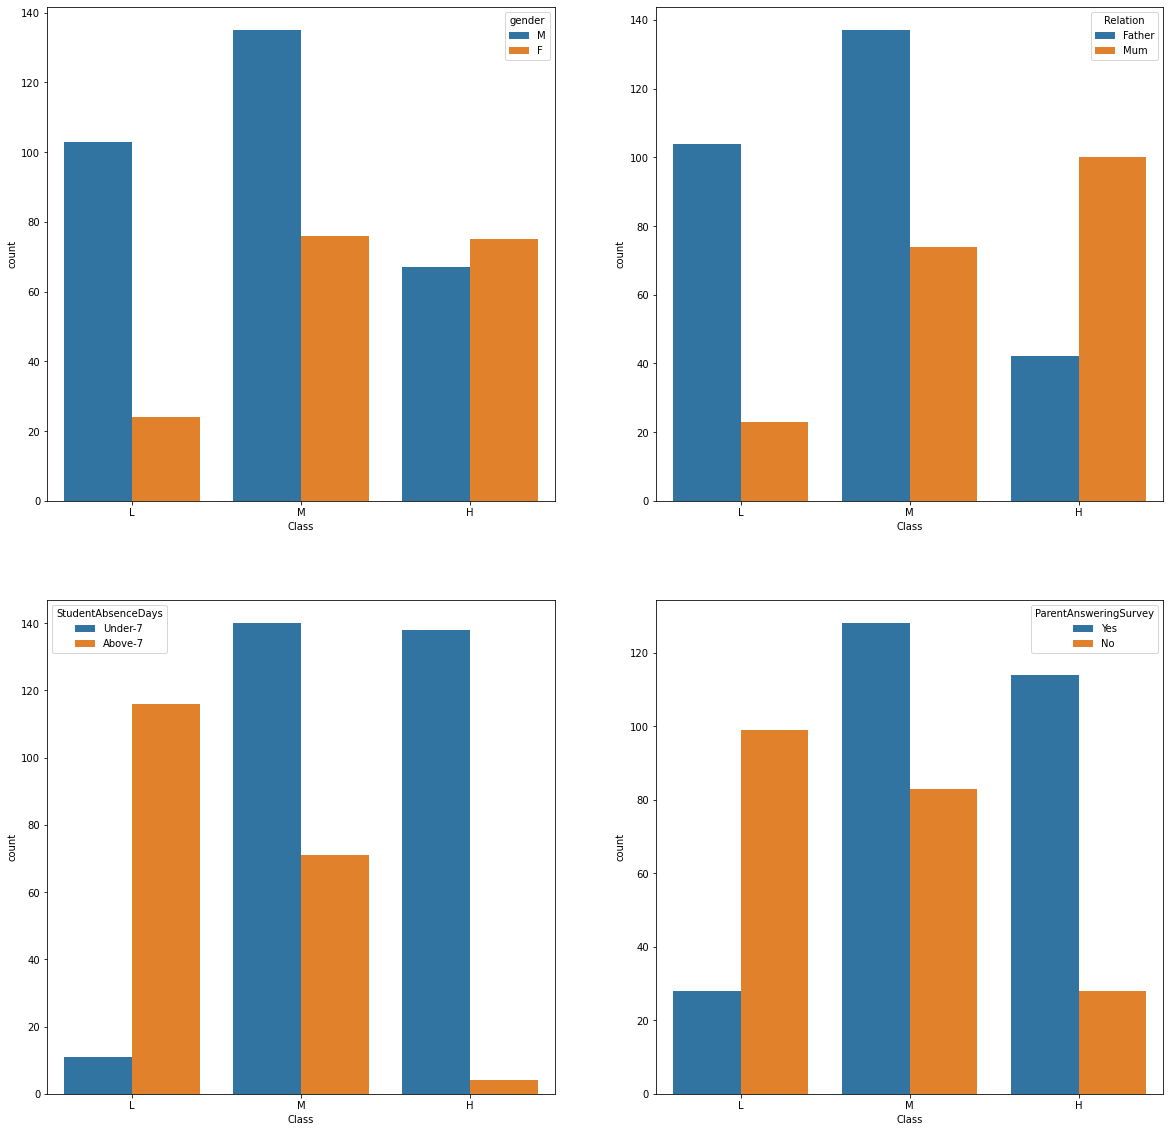

In [9]:
fig, axarr  = plt.subplots(2,2,figsize=(20,20))
sns.countplot(x='Class', hue='gender', data=df, ax=axarr[0,0], order=['L','M','H'], hue_order=['M','F'])
sns.countplot(x='Class', hue='Relation', data=df, ax=axarr[0,1], order=['L','M','H'])
sns.countplot(x='Class', hue='StudentAbsenceDays', data=df, ax=axarr[1,0], order=['L','M','H'])
sns.countplot(x='Class', hue='ParentAnsweringSurvey', data=df, ax=axarr[1,1], order=['L','M','H'])

In [10]:
pd.crosstab(df.Class, df.gender, normalize = 'columns')

gender,F,M
Class,,
H,0.428571,0.219672
L,0.137143,0.337705
M,0.434286,0.442623


In [11]:
pd.crosstab(df.Class, df.Relation, normalize = 'columns')

Relation,Father,Mum
Class,,
H,0.148410,0.507614
L,0.367491,0.116751
M,0.484099,0.375635


In [12]:
pd.crosstab(df.gender, df.StudentAbsenceDays, normalize = 'columns')

StudentAbsenceDays,Above-7,Under-7
gender,,
F,0.240838,0.446367
M,0.759162,0.553633


* Girls seem to have performed better than boys
* Mothers seem to be more interested in their education than fathers
* Girls had much better attendance than boys

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

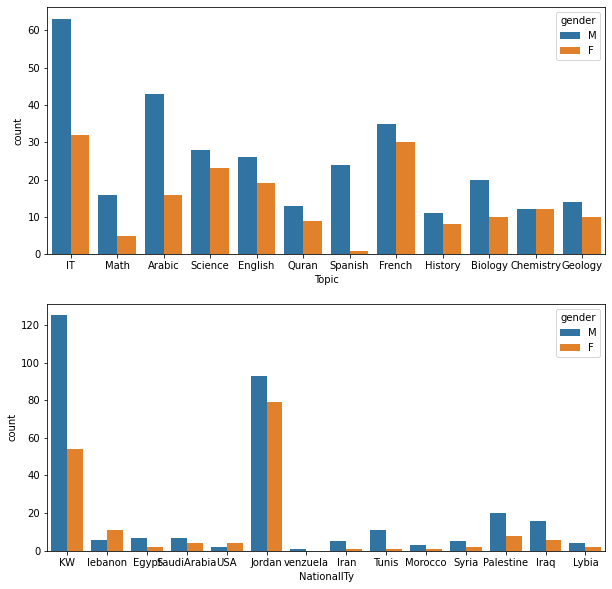

In [13]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=df, ax=axis2)

* No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
* Gender disparity holds even at a country level. May just be as a result of the sampling.

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

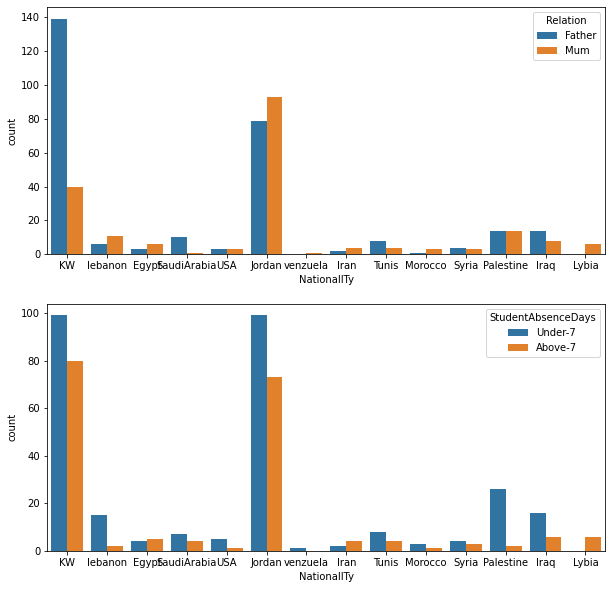

In [14]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='NationalITy', hue='Relation', data=df, ax=axis1)
sns.countplot(x='NationalITy', hue='StudentAbsenceDays', data=df, ax=axis2)

### Q3.Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

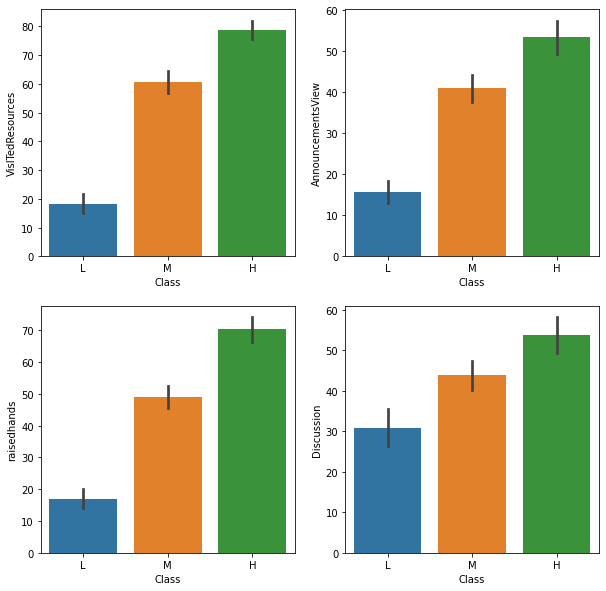

In [15]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=df, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=df, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=df, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=df, order=['L','M','H'], ax=axarr[1,1])

* As expected, those that participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better ...that thing about correlation and causation

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

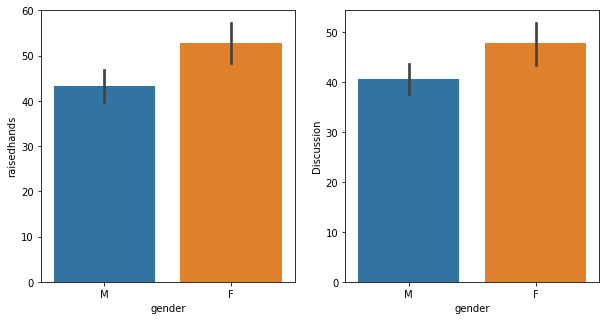

In [16]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))
sns.barplot(x='gender', y='raisedhands', data=df, ax=axis1)
sns.barplot(x='gender', y='Discussion', data=df, ax=axis2)

In [17]:
pd.crosstab(df.gender, df.raisedhands, normalize = 'columns')

raisedhands,0,1,2,3,4,5,6,7,8,9,...,88,89,90,92,95,96,97,98,99,100
gender,,,,,,,,,,,,,,,,,,,,,
F,0.111111,0.0,0.5,0.5,0.0,0.2,1.0,0.142857,0.0,0.666667,...,0.333333,0.4,0.545455,0.25,0.4,0.5,1.0,0.666667,0.0,0.833333
M,0.888889,1.0,0.5,0.5,1.0,0.8,0.0,0.857143,1.0,0.333333,...,0.666667,0.6,0.454545,0.75,0.6,0.5,0.0,0.333333,1.0,0.166667


* Students that perform poorly rarely raise their hands, while students that perform okay have a greater variation of participation. Something to consider may be that the poorly performing students can not raise their hand because they are absent from class.

In [18]:
pd.crosstab(df.Class, df.Topic, normalize = 'columns')

Topic,Arabic,Biology,Chemistry,English,French,Geology,History,IT,Math,Quran,Science,Spanish
Class,,,,,,,,,,,,
H,0.322034,0.533333,0.416667,0.377778,0.307692,0.25,0.210526,0.157895,0.285714,0.363636,0.313725,0.20
L,0.288136,0.133333,0.333333,0.222222,0.246154,0.00,0.157895,0.400000,0.333333,0.272727,0.196078,0.32
M,0.389831,0.333333,0.250000,0.400000,0.446154,0.75,0.631579,0.442105,0.380952,0.363636,0.490196,0.48


### Q4. From the above result, what are the factors that leads to get low grades of the students?

* female students more active in learning behavior
* The mother is responsible for the student’s learning affects the student’s enthusiasm in learning
* The students who participate in class and are not absent very much do better than those students that do not participate and are absent
* The topic should also heavily affect the grade levels, as some disciplines are more challenging than others.
* A LOT of students didn’t do so hot in IT, however lets take a deeper look in to the relative amounts of students for each topic that didn’t do well.
* A full 40% of students failed their IT class… that’s brutal. Tied for second place are Math and Chemistry at 1/3 of students.

### Q5. Build classification model and present it's classification report?

# 3.Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable

In [19]:
Quantitative_Variable = df[df.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [20]:
Qualitative_Variable = df[df.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


### Converting qualitative Variable into number

In [21]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


# 4.Identify & Treatment of Outlier 

<AxesSubplot:>

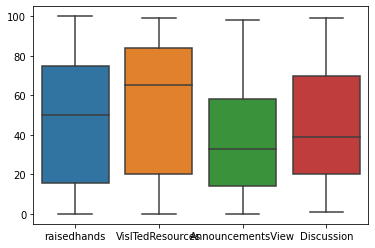

In [22]:
sns.boxplot(data=Quantitative_Variable)

## Combining the data set

In [23]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# 5.Data Partition
* Splitting the data in Training and Test set
* Using sklearn we split 70% of our data into training set and rest in test set.
* Setting random_state will give the same training and test set everytime on running the code

In [24]:
from sklearn.model_selection import train_test_split

x = Final_combined.drop('Class', axis = 1)
y = Final_combined[['Class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=58)

# 6.Model building

# Hypothesis

* H0 :- There is no linear relationship between Class and all independent Variable

Vs 

* H1 :- There is linear relationship between Class and all independent Variable

Alpha = 0.05 (5%)

# Logistics Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
Quantitative_Variable.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


# 7.Predictions on Train Dataset

In [27]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
304,0,3,3,2,1,1,10,0,0,1,0,1,15,50,24,43,2
311,1,3,3,2,1,1,10,1,0,0,1,0,42,34,29,39,2
308,1,7,3,2,1,1,10,0,1,1,1,0,95,57,74,89,2
80,1,4,4,1,4,0,8,0,0,1,0,1,8,15,10,40,1
220,1,12,12,1,5,2,11,1,0,1,1,1,77,69,41,13,2


In [28]:
train['Predicted']=output.predict(x_train)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
304,0,3,3,2,1,1,10,0,0,1,0,1,15,50,24,43,2,2
311,1,3,3,2,1,1,10,1,0,0,1,0,42,34,29,39,2,1
308,1,7,3,2,1,1,10,0,1,1,1,0,95,57,74,89,2,2
80,1,4,4,1,4,0,8,0,0,1,0,1,8,15,10,40,1,2
220,1,12,12,1,5,2,11,1,0,1,1,1,77,69,41,13,2,2


#  Model Performance Metrics

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Class'])
matrix

array([[ 71,   0,  30],
       [  1,  73,  12],
       [ 33,  10, 106]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69       105
           1       0.85      0.88      0.86        83
           2       0.71      0.72      0.71       148

    accuracy                           0.74       336
   macro avg       0.75      0.76      0.76       336
weighted avg       0.74      0.74      0.74       336



* Accuracy of  Model is 74%,Hence Model is good Fit 

# 8.Predictions on Test Dataset

In [31]:
test=pd.concat([x_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
295,1,2,2,2,1,0,10,1,0,1,1,0,62,64,72,84,2
373,0,3,3,2,0,0,0,1,0,0,0,0,5,9,19,98,1
297,0,3,3,2,1,0,10,1,1,0,1,1,72,74,82,89,0
104,1,4,4,2,0,1,7,0,0,1,1,0,0,12,3,3,2
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2


In [32]:
test['Predicted']=output.predict(x_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
295,1,2,2,2,1,0,10,1,0,1,1,0,62,64,72,84,2,2
373,0,3,3,2,0,0,0,1,0,0,0,0,5,9,19,98,1,1
297,0,3,3,2,1,0,10,1,1,0,1,1,72,74,82,89,0,0
104,1,4,4,2,0,1,7,0,0,1,1,0,0,12,3,3,2,1
164,1,3,3,2,0,1,4,1,1,1,1,0,55,72,83,14,2,2


# Model Performance Metrics on Test data 

In [33]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted'],test['Class'])
print(matrix)

[[28  0 13]
 [ 1 36  7]
 [ 8  8 43]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        37
           1       0.82      0.82      0.82        44
           2       0.73      0.68      0.70        63

    accuracy                           0.74       144
   macro avg       0.74      0.75      0.75       144
weighted avg       0.74      0.74      0.74       144



* Accuracy of  Model is 74%,Hence Model is good Fit 